# EDA of NBA Active Players Data

#### Questions:
- What is the current player age distribution?
- At what age do players tend to "peak" statistically?
    - This can be broken down into pts, rbs, fg%, etc
    - Over time (both age and experience), how does performance change?
- What position performs the best? Do certain positions score/rebound/assist more than others?


#### Be Careful:
- If a player is in the NBA for a long time, they have performed well (and vice versa).
- Not every season has the same number of games played... (e.g. COVID year)

#### More Data?
- Height, weight, wingspan
- Right vs. Left shooter
- Draft info
- Salary
- Num injuries

In [119]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df = pd.read_csv('nba.csv').drop(columns = ['Unnamed: 0'])

## Cleaning

In [121]:
# convert numerical fields to correct datatype
numeric_cols = [col for col in df.columns if col not in ['Name', 'Season', 'Tm', 'Lg', 'Pos']]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [122]:
# remove any obs of DID NOT PLAY
discard = ['Did Not Play']
df = df[df['Pos'].str.contains('|'.join(discard))==False]

## Exploring

In [123]:
df.head()

,Name,Exp,Season,Age,Tm,Lg,Pos,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Álex Abrines,1,2016-17,23.0,OKC,NBA,SG,5.0,0.0,16.0,...,0.750,0.4,1.4,1.8,0.8,0.0,0.0,0.0,1.6,4.8
1,Álex Abrines,2,2017-18,24.0,OKC,NBA,SG,6.0,0.0,18.3,...,1.000,0.5,2.2,2.7,0.3,0.8,0.3,0.2,1.8,4.0
2,Precious Achiuwa,1,2020-21,21.0,MIA,NBA,PF,61.0,4.0,12.1,...,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
3,Precious Achiuwa,2,2021-22,22.0,TOR,NBA,C,73.0,28.0,23.6,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
4,Precious Achiuwa,3,2022-23,23.0,TOR,NBA,PF,1.0,0.0,18.0,...,0.500,1.0,4.0,5.0,0.0,0.0,0.0,0.0,1.0,10.0


In [124]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Age'>

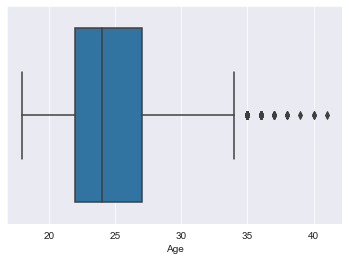

In [125]:
# age distribution
sns.boxplot(data=df, x='Age')

<AxesSubplot:xlabel='Exp'>

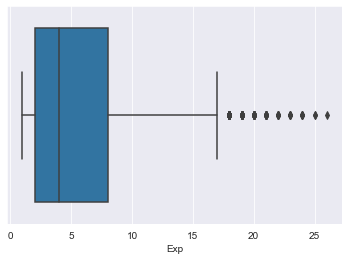

In [126]:
# experience distribution
sns.boxplot(data=df, x='Exp')

In [127]:
# reduce df to players with 10+ yrs experience
experienced_players = df[df['Exp'] >= 10]['Name'].unique()
ten = df[df['Name'].isin(experienced_players)]

# reduce df to seasons where player played at least 10 games
ten = ten[ten['G'] >= 10]

In [128]:
age = ten.groupby('Age')
age.mean()

age_df = age.mean().reset_index()

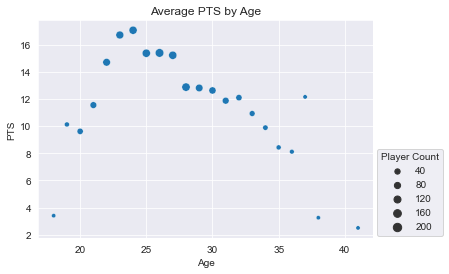

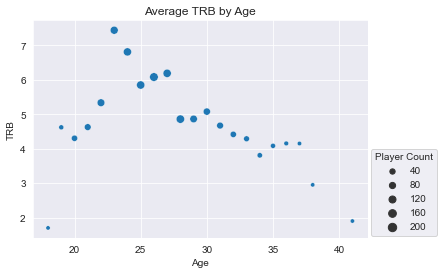

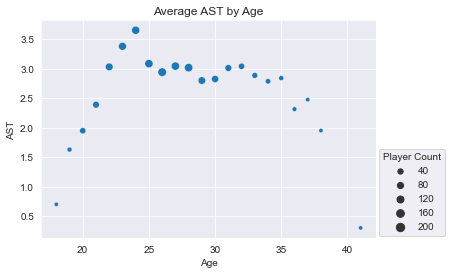

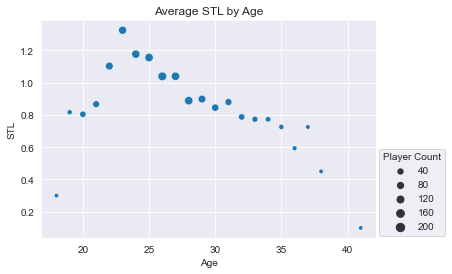

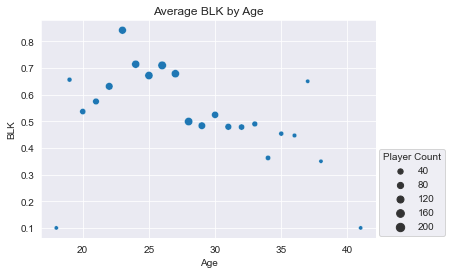

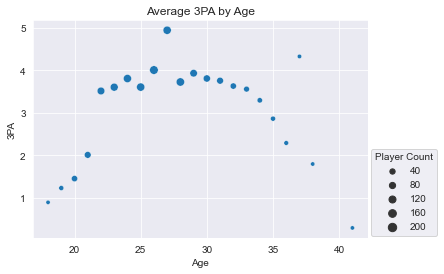

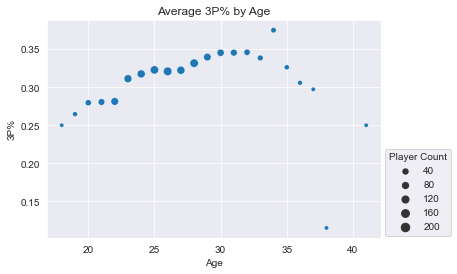

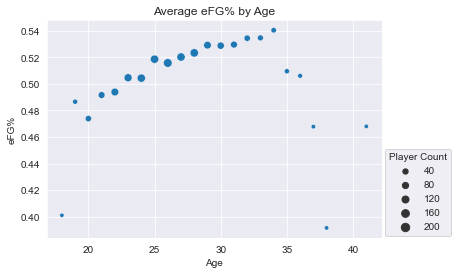

In [129]:
columns_of_interest = ['PTS', 'TRB', 'AST', 'STL', 'BLK', '3PA', '3P%', 'eFG%']

for col in columns_of_interest:

    temp_df = age.describe()[col][['count', 'mean']]
    sns.scatterplot(data=temp_df, x='Age', y='mean', size='count')
    plt.ylabel(col)
    plt.title('Average ' + col + ' by Age')
    plt.legend(title='Player Count', loc=(1.01,0.01))
    plt.show()

In [102]:
df[(df['Age'] == 40) & (df['eFG%'] == 1)]

,Name,Exp,Season,Age,Tm,Lg,Pos,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1873,Udonis Haslem,19,2020-21,40.0,MIA,NBA,C,1.0,0.0,3.0,...,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0
2369,Joe Johnson,24,2021-22,40.0,BOS,NBA,SG,1.0,0.0,2.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
sns.lineplot(data=df, x='Age', y='3P%', size='')

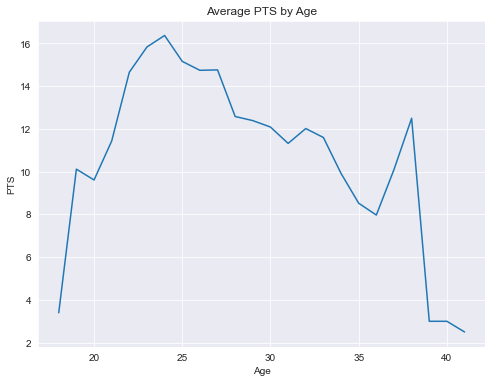

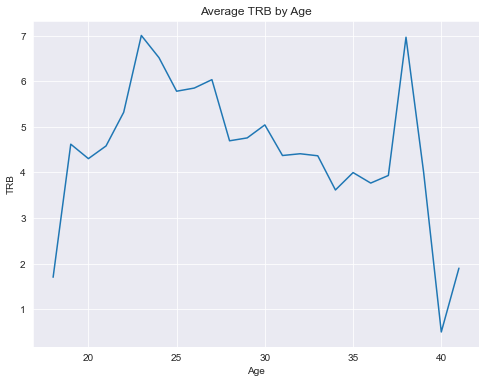

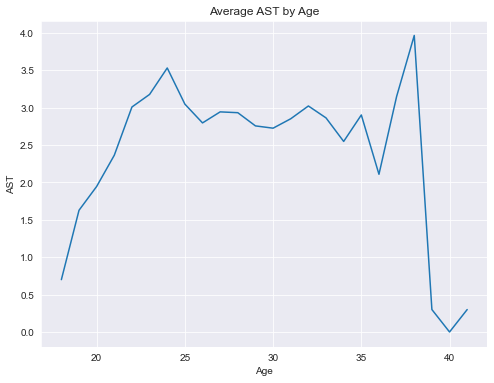

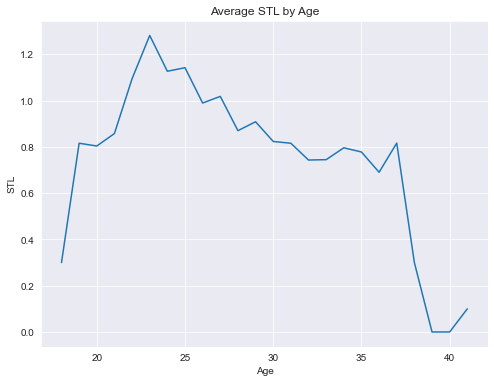

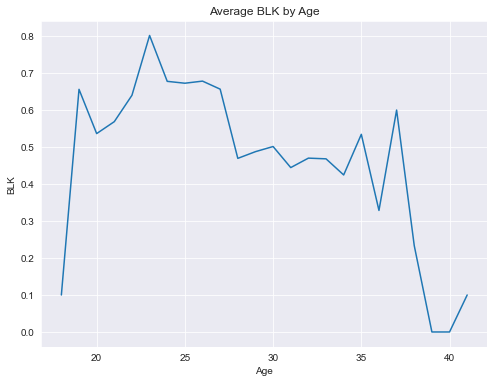

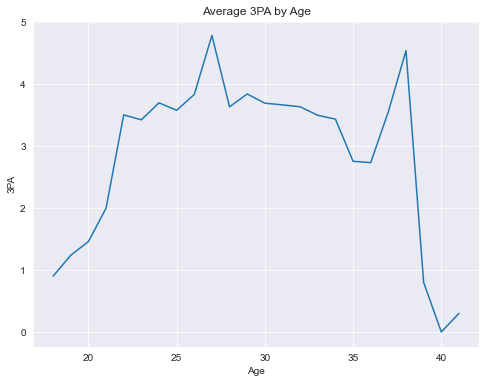

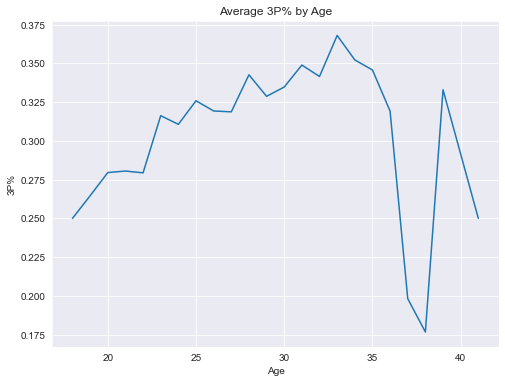

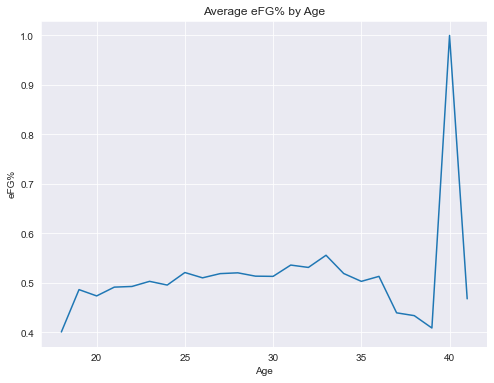

In [82]:
columns_of_interest = ['PTS', 'TRB', 'AST', 'STL', 'BLK', '3PA', '3P%', 'eFG%']

for col in columns_of_interest:
    plt.figure(figsize=(8,6))
    sns.lineplot(data=age_df, x='Age', y=col)
    plt.title('Average ' + col + ' by Age')
    plt.show()

In [67]:
df.Pos.value_counts()
# very few are listed in multiple positions
# reduce to PG, SG, SF, PF, C
valid_pos = ['PG', 'SG', 'SF', 'PF', 'C']
pos = df[df['Pos'].isin(valid_pos)].groupby('Pos')
pos.mean().reset_index()

# make new pos df
pos_df = pos.mean().reset_index()
pos_df

,Pos,Exp,Age,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,C,6.128834,25.414724,42.931288,24.401227,30.923190,5.780000,10.959387,0.528705,0.411534,...,0.680315,2.801227,6.126626,8.927730,1.788466,0.767362,1.320245,1.913988,3.498896,14.452761
1,PF,5.616162,25.122334,39.555556,21.544332,41.404489,6.530303,13.840292,0.459595,1.480584,...,0.722631,2.462402,6.889113,9.348036,2.640404,1.082492,1.015152,2.138159,4.067116,17.448260
2,PG,5.868335,25.341676,42.007617,23.239391,39.046246,5.832318,14.055495,0.410171,1.723069,...,0.790123,0.779761,3.634603,4.411317,6.344070,1.460065,0.317519,2.775626,3.194233,16.046137
3,SF,5.467136,25.076291,42.070423,23.514085,28.009390,4.073474,9.280634,0.425448,1.226878,...,0.756466,1.105869,3.706690,4.810915,1.945540,0.898357,0.479460,1.330282,2.333568,11.273826
4,SG,4.918738,24.704589,40.606119,20.347036,36.183078,5.656023,13.441205,0.414313,1.973040,...,0.777283,0.762333,3.739197,4.499140,3.122945,1.047992,0.330019,1.874474,2.705163,15.619407


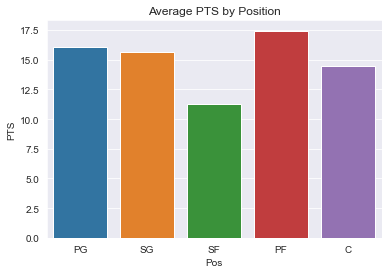

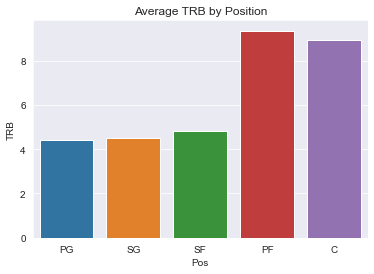

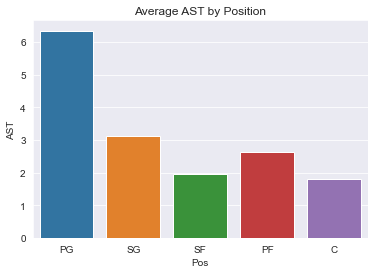

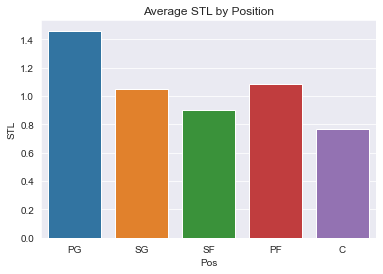

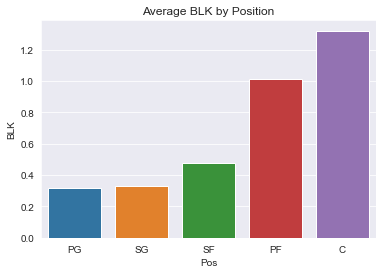

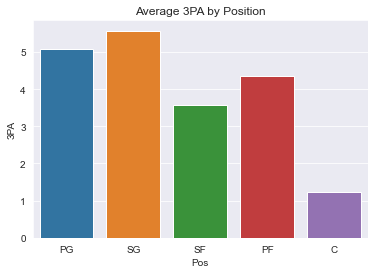

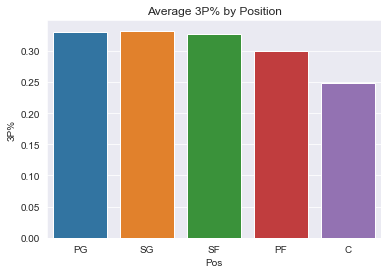

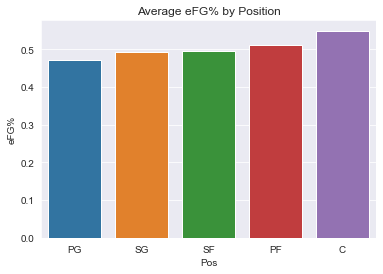

In [76]:
columns_of_interest = ['PTS', 'TRB', 'AST', 'STL', 'BLK', '3PA', '3P%', 'eFG%']

for col in columns_of_interest:
    sns.barplot(data=pos_df, x='Pos', y=col, order=valid_pos)
    plt.title('Average ' + col + ' by Position')
    plt.show()